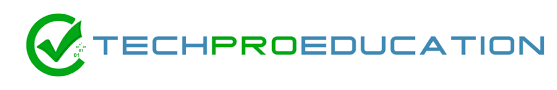

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [125]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl  
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline 
from datetime import datetime
#import warnings;
#warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [126]:
df = pd.read_csv("store_sharing.csv")
df.head()


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [128]:
df.duplicated().value_counts() # no duplicated rows
#df.duplicated().any() --> checks each row

False    17414
dtype: int64

In [129]:
df.shape # no duplicated rows

(17414, 10)

In [130]:
df.isna().sum() # no missing values

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


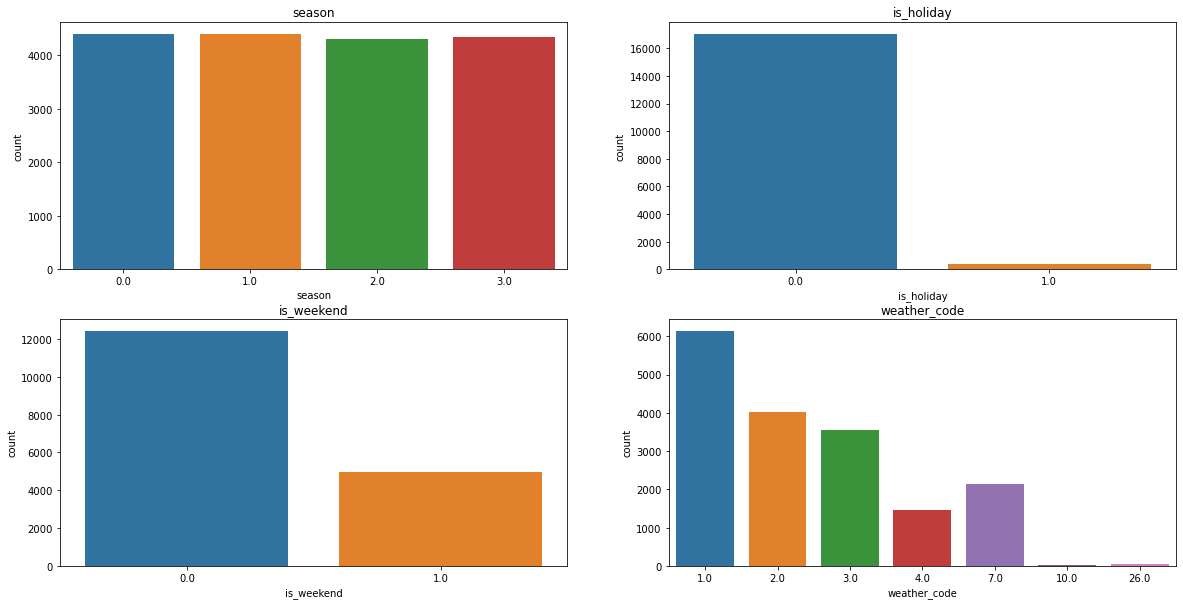

In [131]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10) )

ax[0,0] = sns.countplot(x = df['season'], data = df, ax = ax[0,0])
ax[0,1] = sns.countplot(x = df['is_holiday'], data = df, ax = ax[0,1])
ax[1,0] = sns.countplot(x = df['is_weekend'], ax = ax[1,0])
ax[1,1] = sns.countplot(x = df['weather_code'], ax = ax[1,1])

ax[0,0].set_title("season")
ax[0,1].set_title("is_holiday")
ax[1,0].set_title('is_weekend')
ax[1,1].set_title('weather_code')
plt.show();

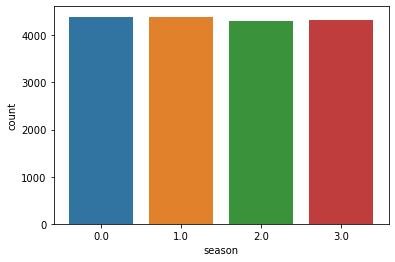

In [132]:
# is_season
sns.countplot(x ='season', data = df)
plt.plot();

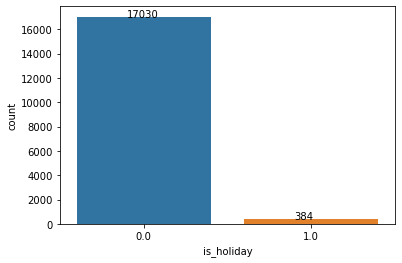

In [133]:
# is_holiday
fig, ax = plt.subplots()

ax = sns.countplot(x = df['is_holiday'])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.5))

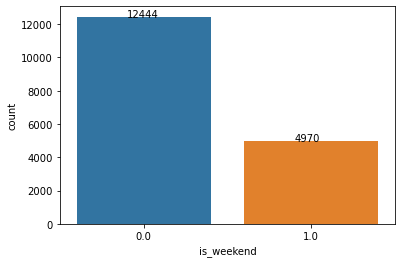

In [134]:
# is_weekend
fig, ax = plt.subplots()
sns.countplot(x = 'is_weekend', data = df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.3, p.get_height() ))

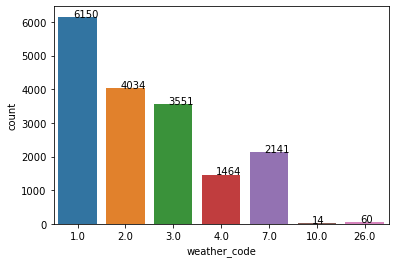

In [135]:
# weather_code
fig, ax = plt.subplots()

ax = sns.countplot(x = df['weather_code'])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.3, p.get_height() ))

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [136]:
df.dtypes # timestamp is object type which means it is stored as str val.

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [137]:
type(df["timestamp"][0])

str

In [138]:
# object (str val) is converted to date type
df['timestamp']= pd.to_datetime(df['timestamp'])

In [139]:
df["timestamp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17414 entries, 0 to 17413
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
17414 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 136.2 KB


In [140]:
df.set_index('timestamp', inplace=True)

In [141]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [142]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0


In [143]:
df["year-month"] = df.index.strftime("%Y-%m")
df["year"] =  df.index.year
df["month"] =  df.index.month
df["day_of_month"] =  df.index.day
df["day_of_week"] =  df.index.dayofweek
df["day_of_name"] = df.index.day_name()
df["hour"] = df.index.hour

In [144]:
df.keys()

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'year-month', 'year', 'month', 'day_of_month',
       'day_of_week', 'day_of_name', 'hour'],
      dtype='object')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year-month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  int64  
 12  day_of_month  17414 non-null  int64  
 13  day_of_week   17414 non-null  int64  
 14  day_of_name   17414 non-null  object 
 15  hour          17414 non-null  int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 2.3+ MB


In [146]:
print('#######################################################################')

for i in range(9,14):
    print('-----------------------------------------------------------------------')
    print(df.columns[i].upper())
    print(df[df.columns[i]].unique())
    print('-----------------------------------------------------------------------')
    print('#######################################################################')

#######################################################################
-----------------------------------------------------------------------
YEAR-MONTH
['2015-01' '2015-02' '2015-03' '2015-04' '2015-05' '2015-06' '2015-07'
 '2015-08' '2015-09' '2015-10' '2015-11' '2015-12' '2016-01' '2016-02'
 '2016-03' '2016-04' '2016-05' '2016-06' '2016-07' '2016-08' '2016-09'
 '2016-10' '2016-11' '2016-12' '2017-01']
-----------------------------------------------------------------------
#######################################################################
-----------------------------------------------------------------------
YEAR
[2015 2016 2017]
-----------------------------------------------------------------------
#######################################################################
-----------------------------------------------------------------------
MONTH
[ 1  2  3  4  5  6  7  8  9 10 11 12]
-----------------------------------------------------------------------
####################

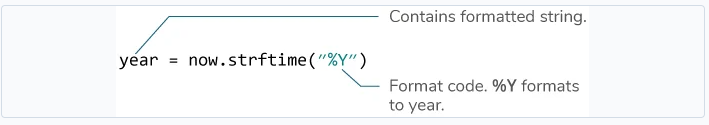

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [147]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,4


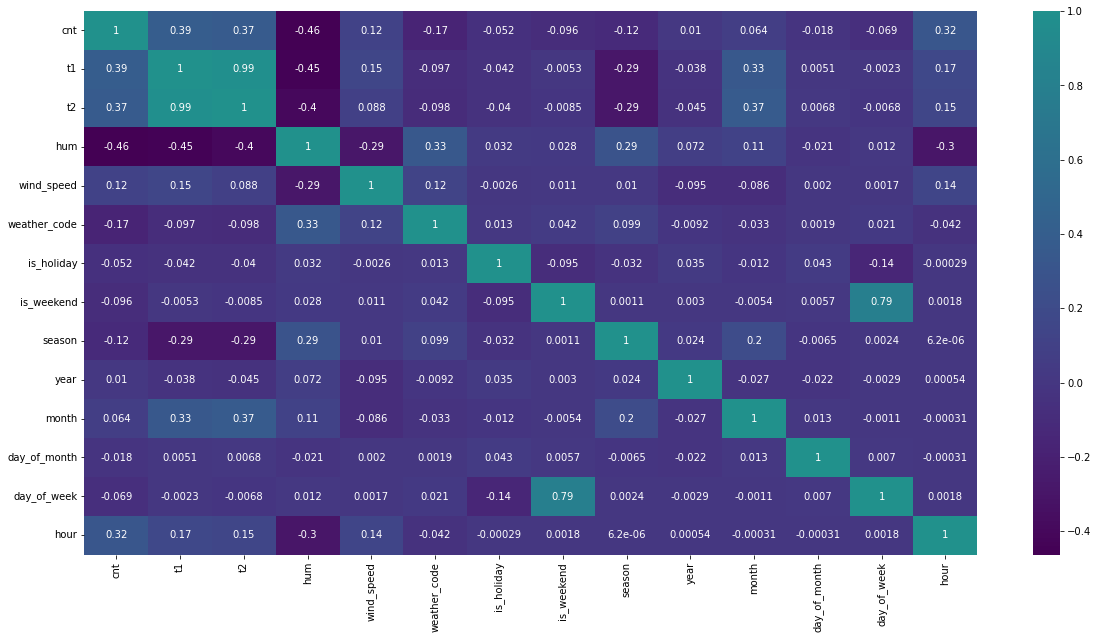

In [148]:
# for all variables 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),  annot=True, cmap='viridis', center = True);

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

In [149]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,2015.507810,6.514643,15.751981,2.99265,11.513265
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,0.508157,3.452509,8.793704,2.00406,6.915893
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,1.00000,6.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,2016.000000,7.000000,16.000000,3.00000,12.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,2016.000000,10.000000,23.000000,5.00000,18.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,2017.000000,12.000000,31.000000,6.00000,23.000000


In [150]:
bike_corr = round(df.corr().iloc[0].sort_values(ascending=False), 2)
bike_corr
## even there is no strong relation between any feature, the most related ones are listed below:
## the relation between bike shares and t1, t2, and wind_speed are the direct relation.
## the relation between bike shares and weather_code,and hum are the indirect relation.
## let us monitor relation betw the stong positive and negative corr below:

cnt             1.00
t1              0.39
t2              0.37
hour            0.32
wind_speed      0.12
month           0.06
year            0.01
day_of_month   -0.02
is_holiday     -0.05
day_of_week    -0.07
is_weekend     -0.10
season         -0.12
weather_code   -0.17
hum            -0.46
Name: cnt, dtype: float64

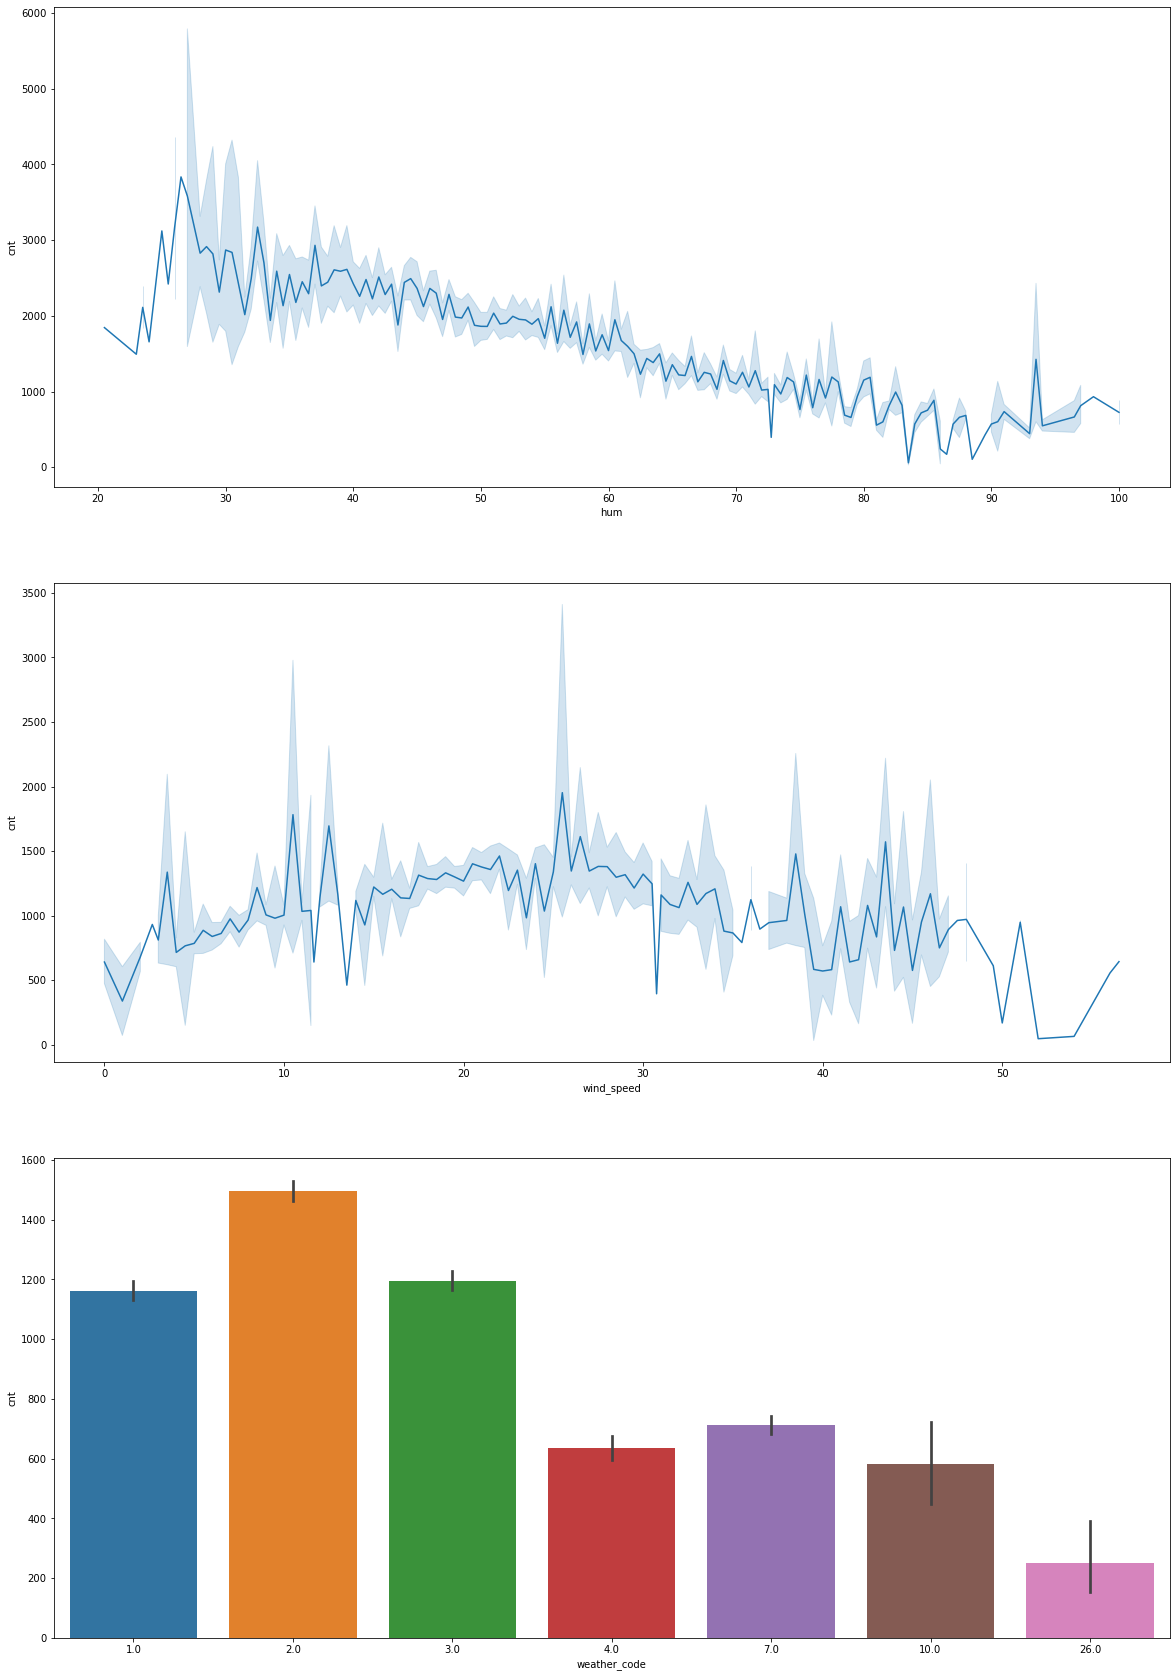

In [159]:
fig, ax = plt.subplots(3, 1, figsize = (20, 30))

ax[0] = sns.lineplot(data = df, x = "hum", y = "cnt", ax = ax[0])
ax[1] = sns.lineplot(data = df, x = "wind_speed", y = "cnt", ax = ax [1])
ax[2] = sns.barplot(data = df, x = "weather_code", y = "cnt", ax = ax [2])

# as the humidity increases, the number of bikes shared decreases (neg. rel.)
# as the wind_speed increases, the number of bikes shared decreases. (neg. rel.)
# as the weather_code increases (gets colder), the number of bikes shared decreases.(neg. rel.)

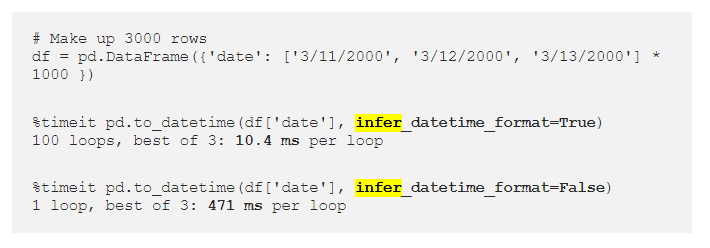

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

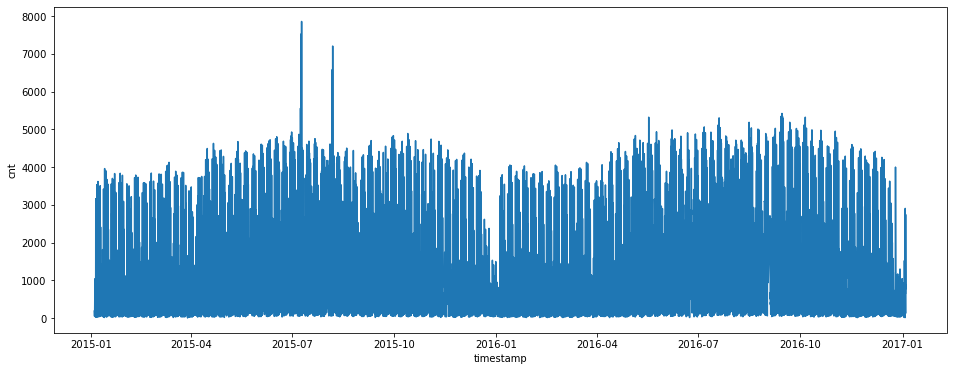

In [160]:
plt.figure(figsize = (16, 6))
sns.lineplot(x = 'timestamp', y = 'cnt', data = df);

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [161]:
year = df.groupby(['year'])

In [162]:
year['cnt'].sum()

year
2015     9738746
2016    10129546
2017       37680
Name: cnt, dtype: int64

In [163]:
month = df.groupby(['month'])

In [164]:
month['cnt'].sum()

month
1     1166837
2     1136504
3     1352461
4     1600427
5     1897348
6     1967130
7     2286214
8     2171265
9     1891097
10    1800752
11    1381191
12    1254746
Name: cnt, dtype: int64

In [165]:
month_year = df.groupby(['month', 'year'])

In [166]:
month_year['cnt'].sum()

month  year
1      2015     546639
       2016     582518
       2017      37680
2      2015     543594
       2016     592910
3      2015     695934
       2016     656527
4      2015     831582
       2016     768845
5      2015     895413
       2016    1001935
6      2015    1033252
       2016     933878
7      2015    1120687
       2016    1165527
8      2015    1033951
       2016    1137314
9      2015     892478
       2016     998619
10     2015     865046
       2016     935706
11     2015     677332
       2016     703859
12     2015     602838
       2016     651908
Name: cnt, dtype: int64

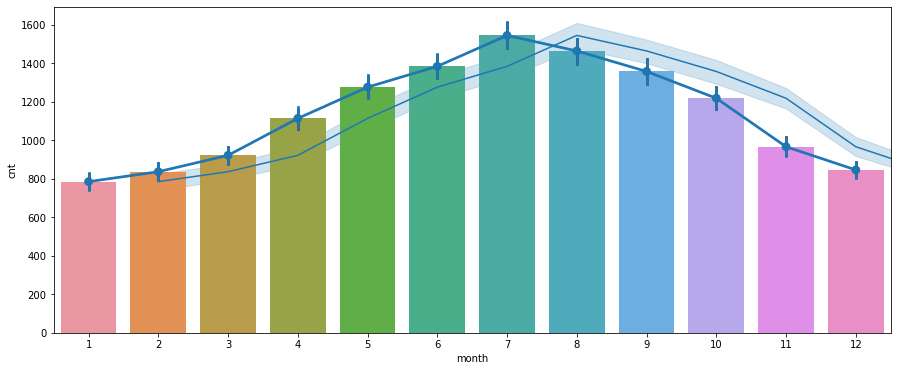

In [167]:
plt.subplots(figsize = (15,6))

sns.lineplot( data = df, x = "month", y = "cnt")
sns.barplot( data = df, x = "month", y = "cnt")
sns.pointplot( data = df, x = "month", y = "cnt");


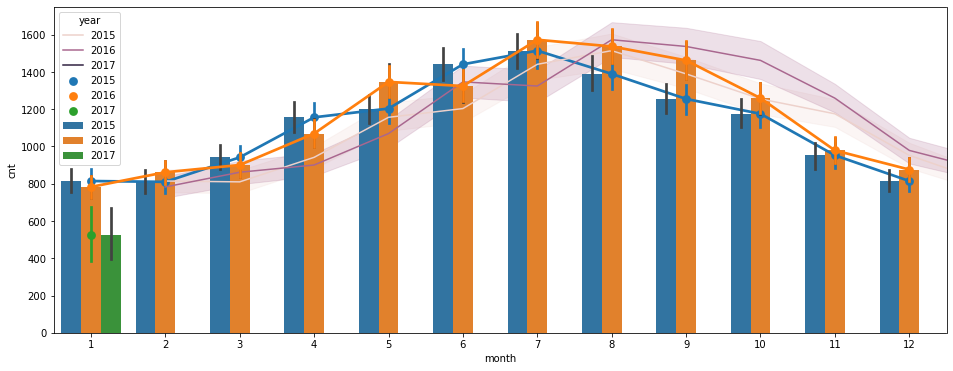

In [168]:
plt.subplots(figsize = (16,6))

sns.lineplot( data = df, x = "month", y = "cnt", hue="year")
sns.barplot( data = df, x = "month", y = "cnt", hue="year")
sns.pointplot( data = df, x = "month", y = "cnt", hue="year");


<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

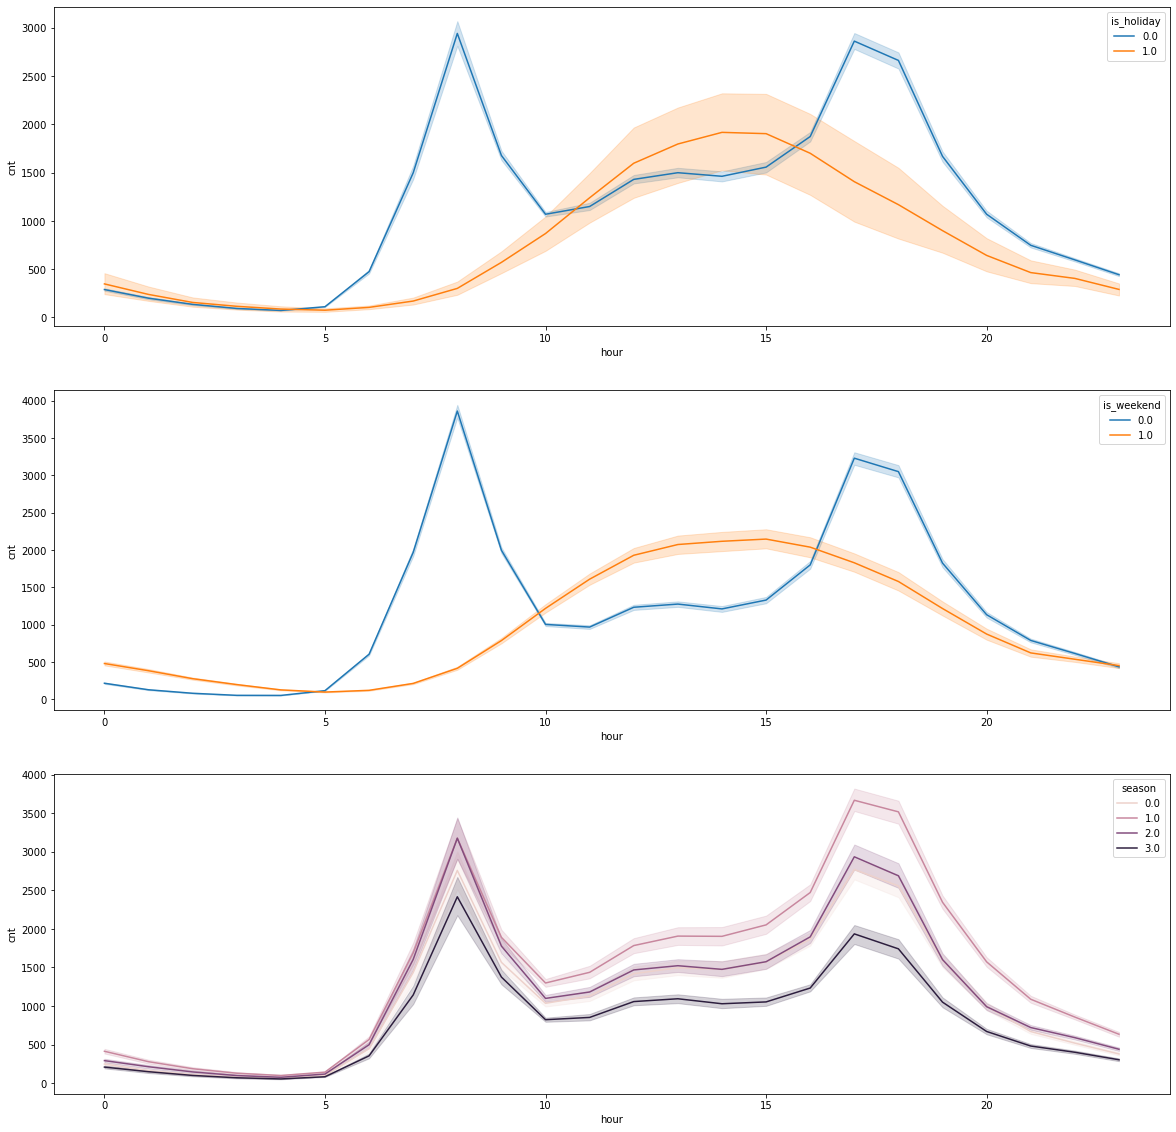

In [169]:
fig, ax = plt.subplots(3,1,figsize = (20,20))

ax[0] = sns.lineplot( data = df, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[0])
ax[1] = sns.lineplot( data = df, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[1])
ax[2] = sns.lineplot( data = df, x = "hour", y = "cnt", hue = "season", ax = ax[2])


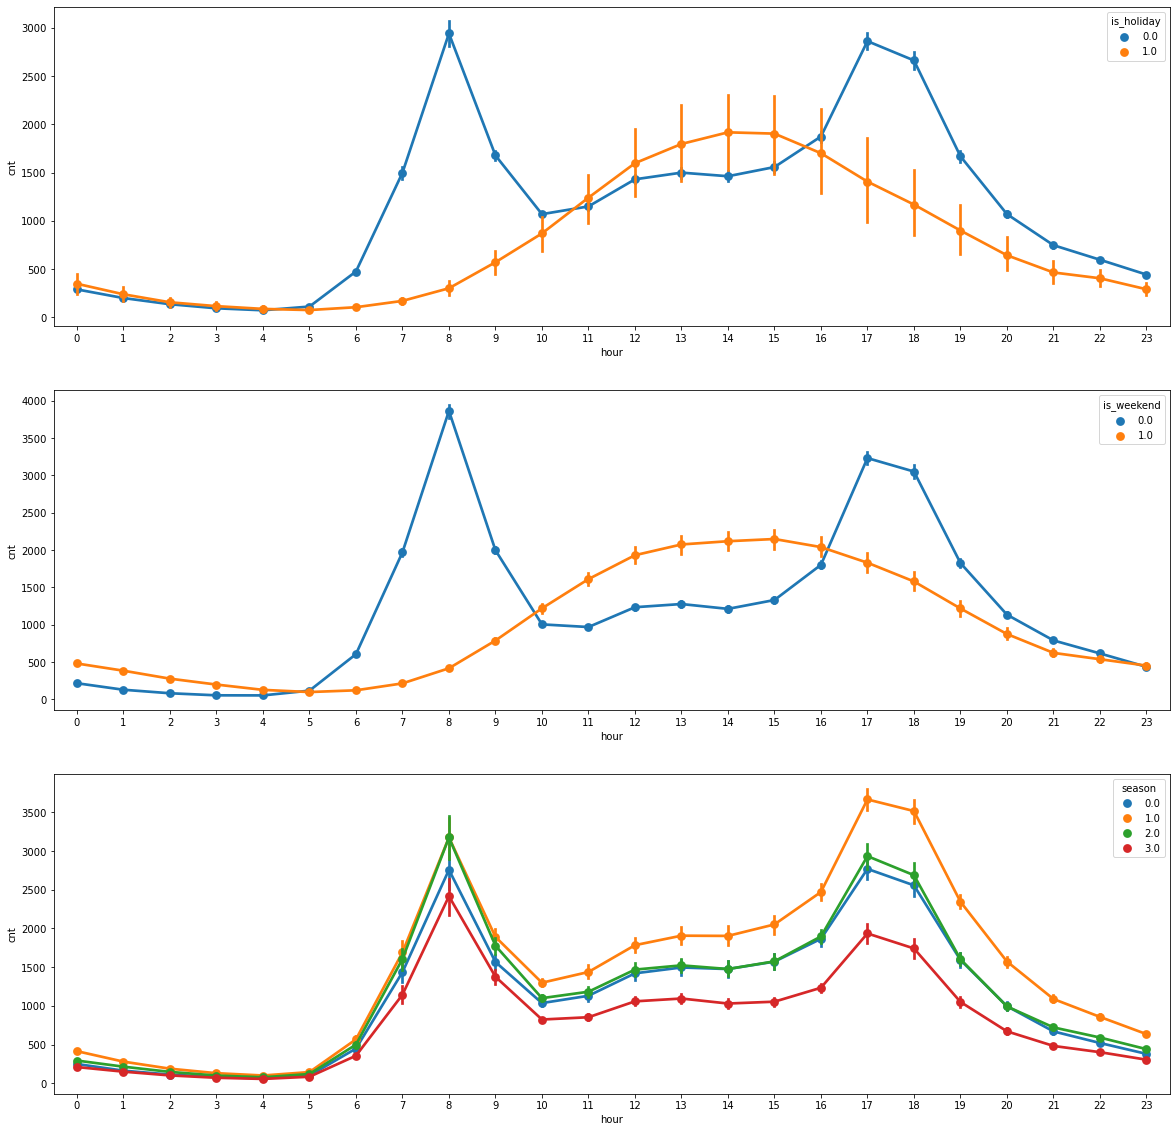

In [170]:
fig, ax = plt.subplots(3,1,figsize = (20,20))

ax[0] = sns.pointplot( data = df, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[0])
ax[1] = sns.pointplot( data = df, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[1])
ax[2] = sns.pointplot( data = df, x = "hour", y = "cnt", hue = "season", ax = ax[2])


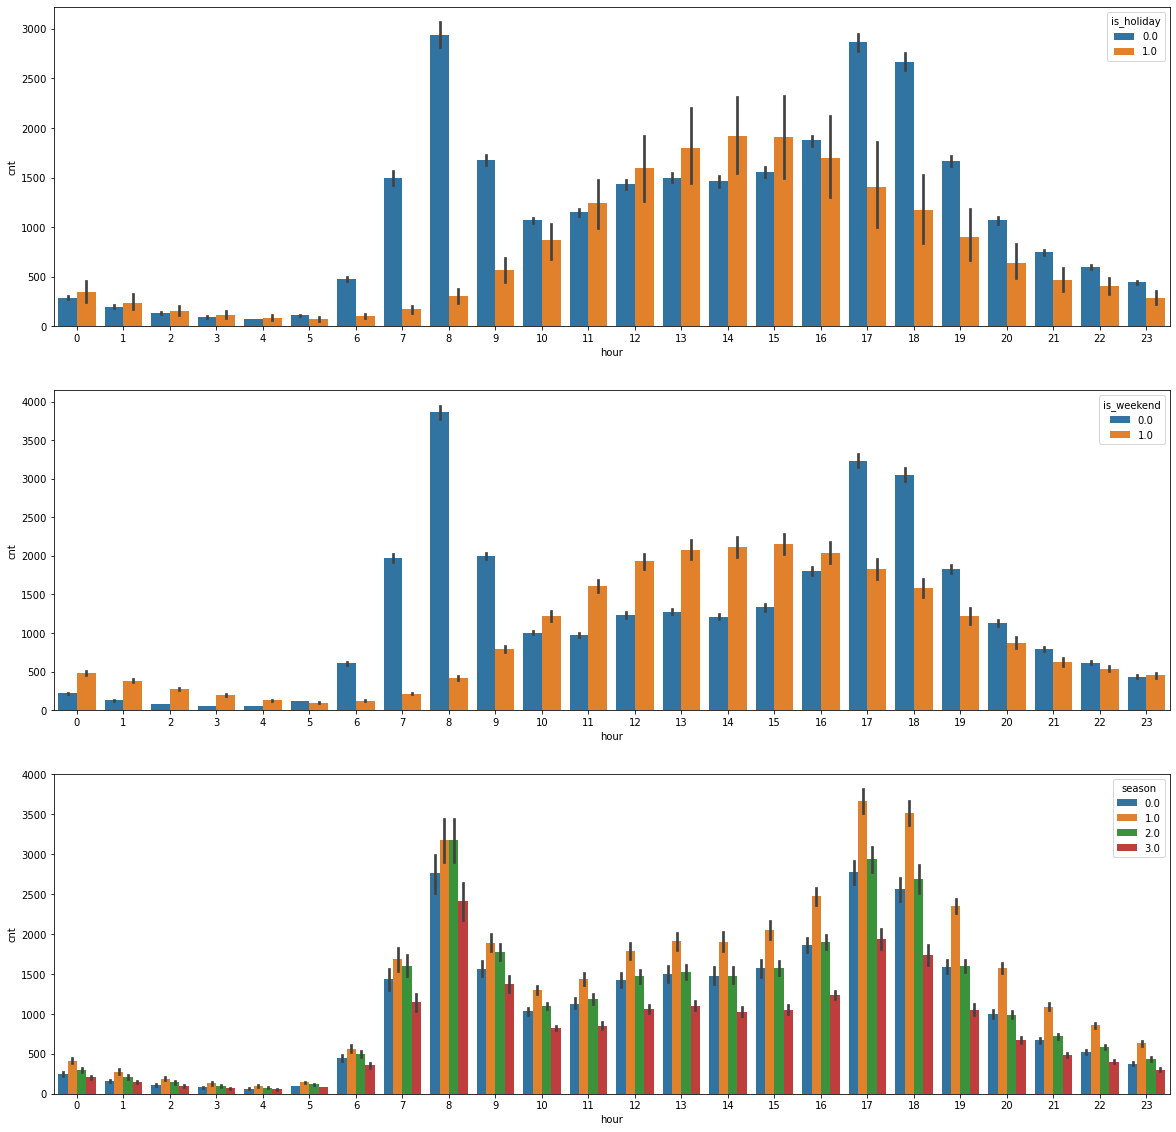

In [171]:
fig, ax = plt.subplots(3,1,figsize = (20,20))

ax[0] = sns.barplot( data = df, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[0])
ax[1] = sns.barplot( data = df, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[1])
ax[2] = sns.barplot( data = df, x = "hour", y = "cnt", hue = "season", ax = ax[2])


<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

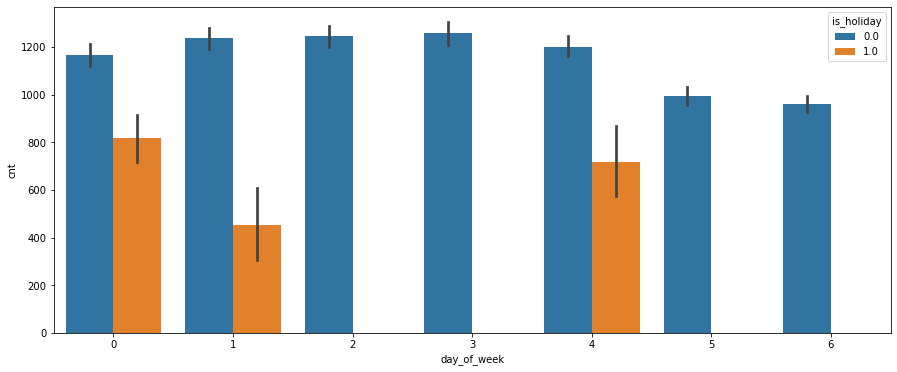

In [173]:
plt.subplots(figsize = (15,6))
sns.barplot(data = df, x = "day_of_week", y = "cnt", hue = "is_holiday");


<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

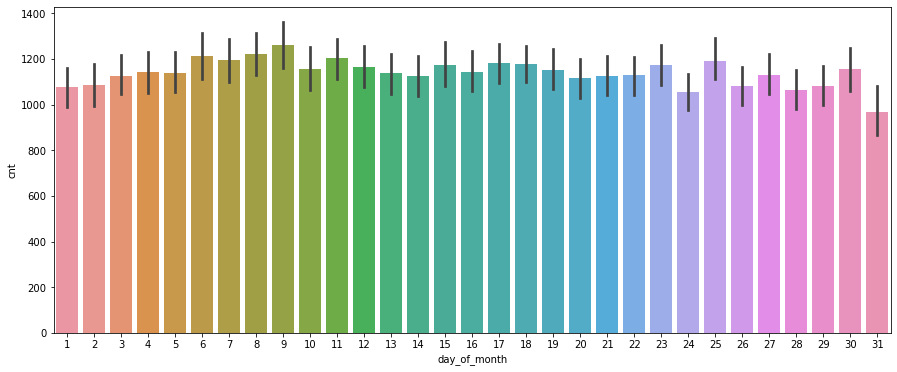

In [174]:
plt.subplots(figsize = (15,6))
sns.barplot(data = df, x = "day_of_month", y = "cnt");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

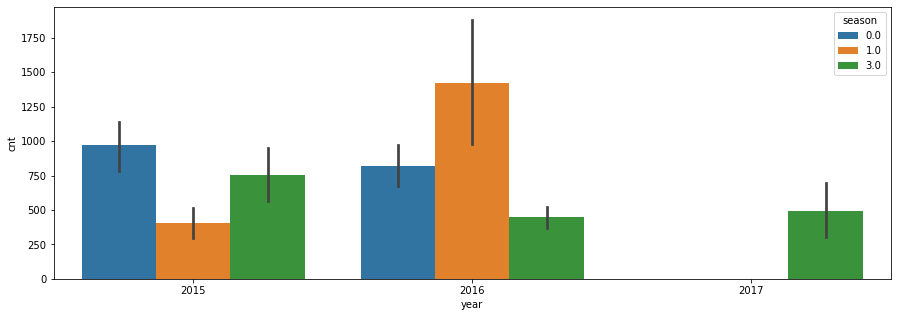

In [175]:
plt.figure(figsize = (15,5))
sns.barplot(data=df[df['is_holiday'] == 1], x="year", y="cnt", hue="season");


In [176]:
df[(df['season'] == 2.0) & (df['is_holiday'] == 1)].value_counts()
# There is no data for fall seasons weekends!!!

Series([], dtype: int64)

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

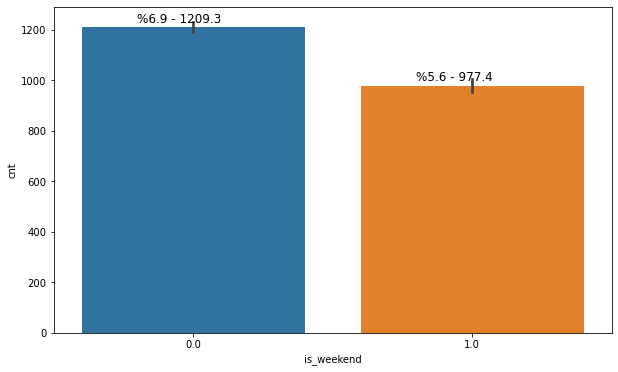

In [177]:
fig, ax = plt.subplots( figsize = (10, 6))
ax = sns.barplot(data = df, x = "is_weekend", y = "cnt");


for bar in ax.patches: 
        ax.annotate( ( "%"+str(round(100*bar.get_height()/len(df["is_weekend"]),1)) +' - '+ str(round(bar.get_height(),1)) ), 
                    (bar.get_x()+0.2 , bar.get_height()+20) ,
                    size=12)
# the amount per day is remained almost the same.

In [178]:
x = df["is_weekend"].value_counts().values
x

array([12444,  4970])

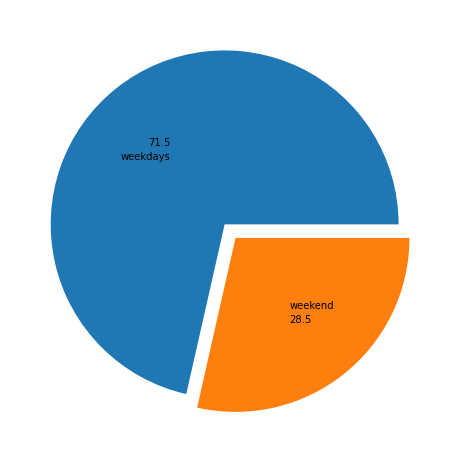

In [179]:
x = df["is_weekend"].value_counts().values
mylabels = ["weekdays", "weekend"]
explode_list= [0, 0.1]
plt.figure(figsize=(10, 8))
plt.pie(x, labels = mylabels, labeldistance=0.50,autopct ="%.1f", explode = explode_list)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

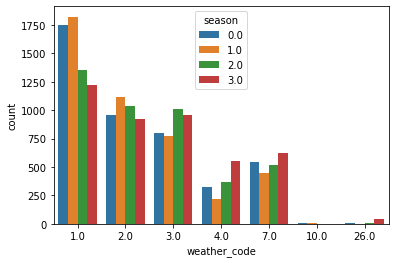

In [180]:
sns.countplot(x="weather_code", data=df, hue = "season" );


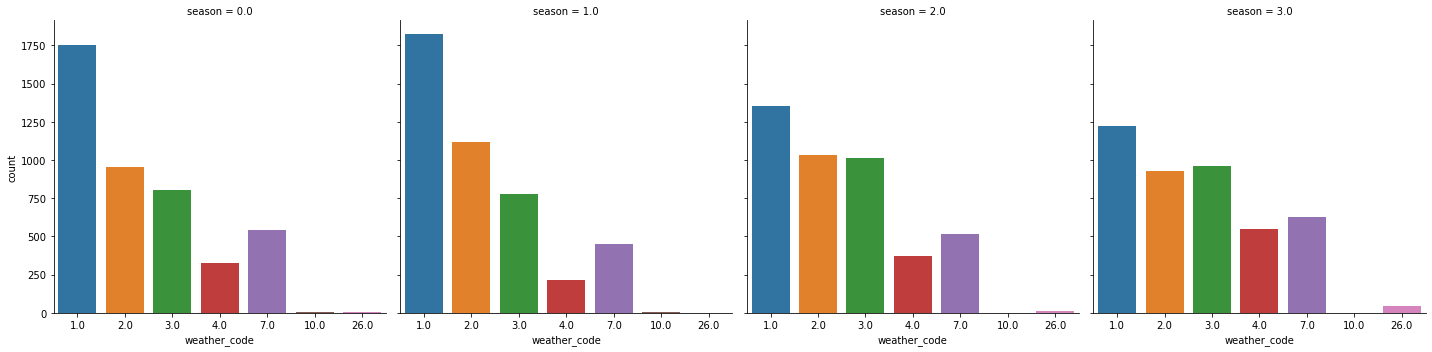

In [181]:
sns.catplot(data = df, x = "weather_code", col = "season", kind ="count");

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

In [182]:
## people tend to share bicycles as the weather is not foggy, snowy and rainy.
## good weather increases the amount of shared bicycles.
## the weekdays has almost no effect on the amount of the bicycles shared.
## the amount of the bicycles shared is mainly affected by the hours of the days which are early in the morning and evening times.
## we may conclude that people tend to get bicycles before or after work.
## seasons has been changing the preference. cold seasons make people choosing less than warm seasons.

## all in all, """people mainly prefer the bicycles to get to work""" accordingly with the weather and tempreature. 
## the matters that affect temperature and weather affect the likeliness people use bicycles to get to work.


<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

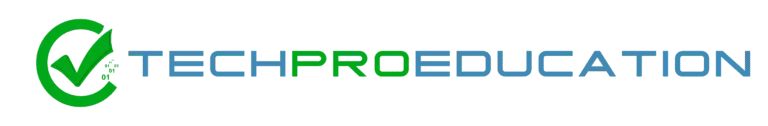